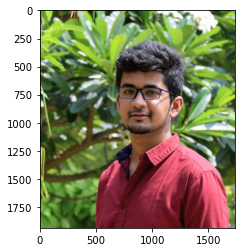

In [2]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2

image = cv2.imread('F:/Download/DSC_0068~100.JPG')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#fd is feature descriptor(used to represent image)
#fd is the histogram 
fd, hog_img = hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)
#multichannel for better acc. can also work on grey scale image.


#plot input and hog image

plt.imshow(image)

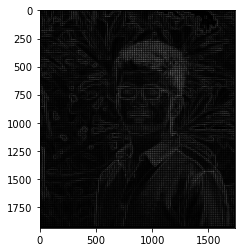

In [3]:
hog_image_rescaled = exposure.rescale_intensity(hog_img,in_range=(0,10))
plt.imshow(hog_image_rescaled,cmap=plt.cm.gray)
plt.show()

In [4]:
image.shape

(1935, 1734, 3)

In [5]:
len(fd)

103680

## Face Detection

In [6]:
import face_recognition

from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
%matplotlib inline

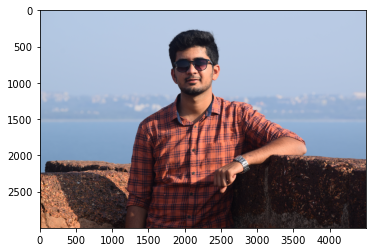

In [16]:
image = cv2.imread('F:/Download/DSC_0063.JPG')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [17]:
image.shape

(3000, 4496, 3)

In [18]:
face_locations = face_recognition.face_locations(image)
len(face_locations)

1

top 542, left 1835, bottom 1096, right 2390


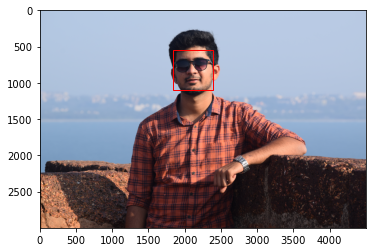

In [19]:
#get axis handle
plt.imshow(image)
ax=plt.gca()


#repeat for all faces found
for face_location in face_locations:
    #print the location of each face in the image. each face is a list of coordinates
    top,right,bottom,left = face_location
    x,y,w,h = left,top,right,bottom
    print(f'top {top}, left {left}, bottom {bottom}, right {right}')
    
    #let's draw box around the face
    
    rect = Rectangle((x,y),w-x,h-y,fill=False,color='red')
    ax.add_patch(rect)

plt.show()

## Face Recognition

In [21]:
image = cv2.imread('F:/Download/DSC_0346.JPG')
one = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread('F:/Download/DSC_0063.JPG')
two = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread('F:/Download/DSC_0068~100.JPG')
three = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [24]:
one_encoding = face_recognition.face_encodings(one)[0]
two_encoding = face_recognition.face_encodings(two)[0]
three_encoding = face_recognition.face_encodings(three)[0]
#[0] is written to take encodings of only first detected image.
#incase if the image has multiple faces.
known_face_encodings = [one_encoding,two_encoding,three_encoding]

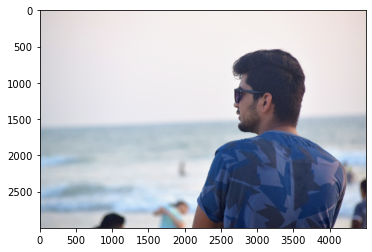

In [35]:
#load the image we want to check 
image = cv2.imread('F:/Download/DSC_0127~2.JPG')
unknown = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown)

In [37]:
unknown_face_encodings = face_recognition.face_encodings(unknown)
#[0] is not taken because we want to check for all faces in the images.


In [38]:
from scipy.spatial import distance

for unknwon_face_encoding in unknown_face_encodings:
    
    result = []
    for know_face_encoding in known_face_encodings:
        
        d = distance.euclidean(know_face_encoding,unknwon_face_encoding)
        #d is the euclidean distance btw two encodings
        result.append(d)
        
    threshold=0.6
    result = np.array(result) <= threshold
    
    if result[0]:
        name = 'one'
        
    elif result[1]:
        name = 'two'
        
    elif result[2]:
        name = 'three'
        
    print(f'found {name} in the photo')
        

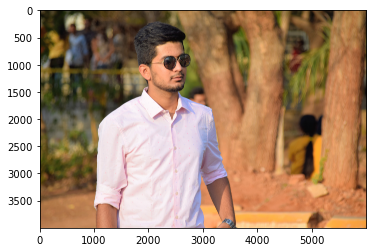

In [39]:
image = cv2.imread('F:/Download/DSC_0436~2.JPG')
unknown = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown)
unknown_face_encodings = face_recognition.face_encodings(unknown)

In [40]:
for unknwon_face_encoding in unknown_face_encodings:
    
    result = []
    for know_face_encoding in known_face_encodings:
        
        d = distance.euclidean(know_face_encoding,unknwon_face_encoding)
        #d is the euclidean distance btw two encodings
        result.append(d)
        
    threshold=0.6
    result = np.array(result) <= threshold
    
    if result[0]:
        name = 'one'
        
    elif result[1]:
        name = 'two'
        
    elif result[2]:
        name = 'three'
        
    print(f'found {name} in the photo')

found one in the photo
